# seaborn高级分析-离散变量分析


* 观测点的直接展示：swarmplot, stripplot
* 观测近似分布的展示：boxplot, violinplot
* 均值和置信区间的展示：barplot, pointplot

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
np.random.seed(2017)
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

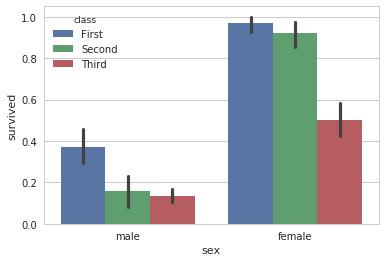

In [2]:
titanic
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

## 分类散点图

当有一维数据是分类数据时，散点图成为了条带形状。

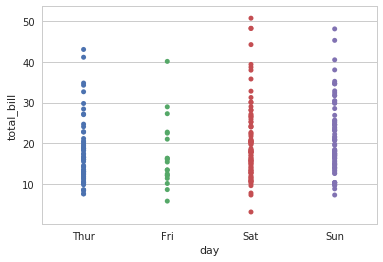

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips)

散点都在一起看不清楚？还记得抖动的方法咩~

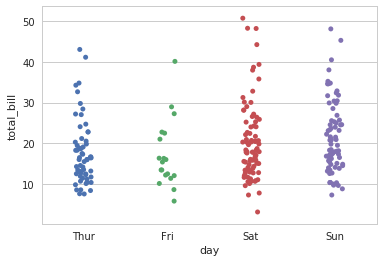

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

另外一种处理办法，是生成蜂群图，避免散点重叠~

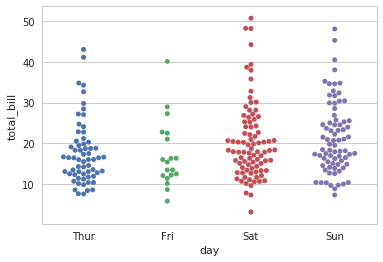

In [5]:
sns.swarmplot(x="day", y="total_bill", data=tips)

在每一个一级分类内部可能存在二级分类

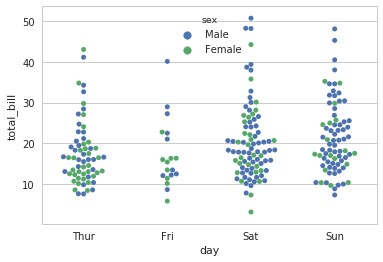

In [6]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

## 分类分布图

### 箱图
上边缘、上四分位数、中位数、下四分位数、下边缘

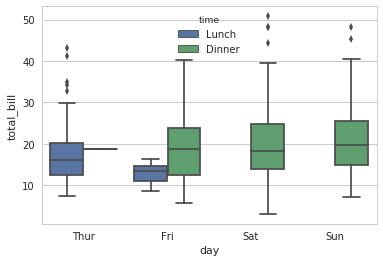

In [7]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### 提琴图
箱图 + KDE(Kernel Distribution Estimation)

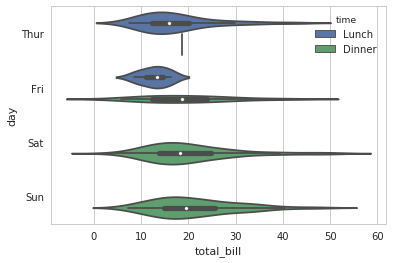

In [8]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

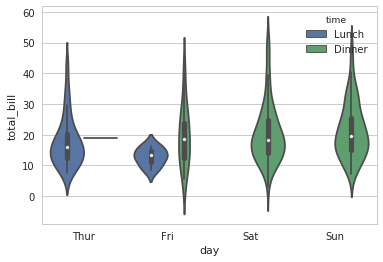

In [9]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips)

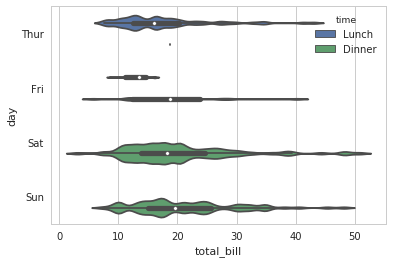

In [10]:
#bw压缩程度
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

In [11]:
# why not is a single violin?

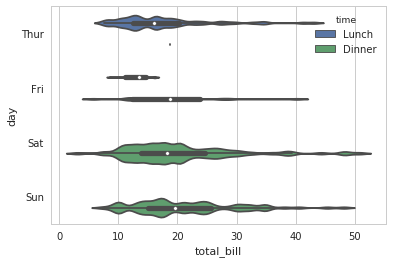

In [12]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

非对称提琴图

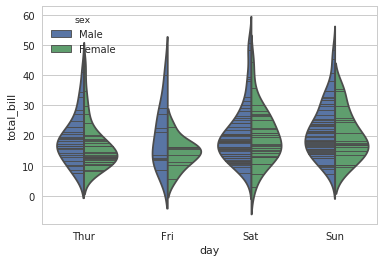

In [13]:
# split=True,会把hue分组合并一起，前提hue的取值必须是二值的
# inner="stick"，会把样本以竖线形式填充到里面
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="stick")

## 分类统计估计图

### 统计柱状图

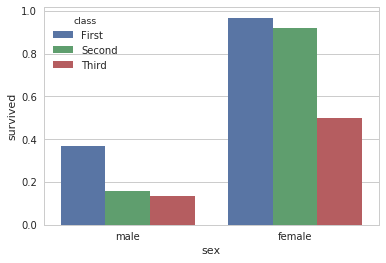

In [14]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ci=None)

### 灰度柱状图

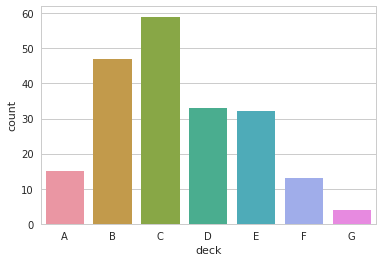

In [15]:
sns.countplot(x="deck", data=titanic) #对应pandas中的value_counts

### 点图

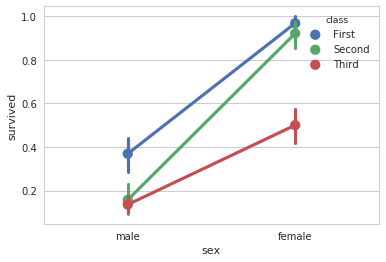

In [16]:
# 点表示均值，竖线表示置信区间
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

修改颜色、标记、线型

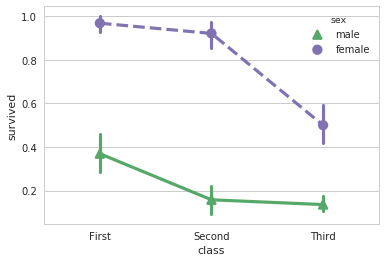

In [17]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

## 分类子图

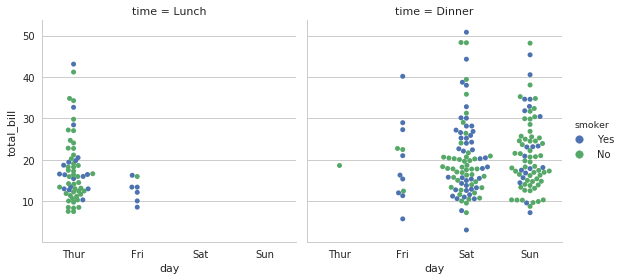

In [18]:
#kind指定画哪种图
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")

多分类标准的子图

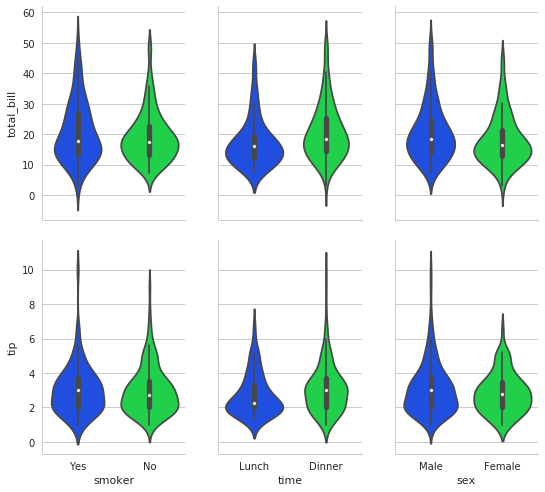

In [19]:
# 产生3*2=6个网格
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)

# 每个网格都做一个violinplot
g.map(sns.violinplot, palette="bright");